# Time series

In [393]:
from pandas.tseries.offsets import Hour, Minute, Day, MonthEnd
from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
from datetime import datetime
import pytz
pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 4))

In [394]:
%matplotlib inline

## Date and Time Data Types and Tools

In [395]:

now = datetime.now()
now

datetime.datetime(2020, 6, 22, 14, 56, 1, 364597)

In [396]:
now.year, now.month, now.day

(2020, 6, 22)

In [397]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(days=926, seconds=56700)

In [398]:
delta.days

926

In [399]:
delta.seconds

56700

In [400]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [401]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### Converting between string and datetime

In [402]:
stamp = datetime(2011, 1, 3)

In [403]:
str(stamp)

'2011-01-03 00:00:00'

In [404]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [405]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [406]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [407]:
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [408]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [409]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [410]:
datestrs

['7/6/2011', '8/6/2011']

In [411]:
pd.to_datetime(datestrs)
# note: output changed (no '00:00:00' anymore)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

In [412]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)

In [413]:
idx[2]

NaT

In [414]:
pd.isnull(idx)

array([False, False,  True])

## Time Series Basics

In [415]:
from datetime import datetime
dates = [
    datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),
    datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)
]
ts = Series(np.random.randn(6), index=dates)
ts

2011-01-02    0.408423
2011-01-05   -1.552477
2011-01-07    0.854127
2011-01-08   -1.214122
2011-01-10   -0.904567
2011-01-12    1.321272
dtype: float64

In [416]:
type(ts)
# note: output changed to "pandas.core.series.Series"

pandas.core.series.Series

In [417]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [418]:
ts + ts[::2]

2011-01-02    0.816845
2011-01-05         NaN
2011-01-07    1.708254
2011-01-08         NaN
2011-01-10   -1.809134
2011-01-12         NaN
dtype: float64

In [419]:
ts.index.dtype
# note: output changed from dtype('datetime64[ns]') to dtype('<M8[ns]')

dtype('<M8[ns]')

In [420]:
stamp = ts.index[0]
stamp
# note: output changed from <Timestamp: 2011-01-02 00:00:00> to Timestamp('2011-01-02 00:00:00')

Timestamp('2011-01-02 00:00:00')

### Indexing, selection, subsetting

In [421]:
stamp = ts.index[2]
ts[stamp]

0.8541271289425072

In [422]:
ts['1/10/2011']

-0.9045672030871535

In [423]:
ts['20110110']

-0.9045672030871535

In [424]:
longer_ts = Series(
    np.random.randn(1000),
    index=pd.date_range('1/1/2000', periods=1000)
)
longer_ts

2000-01-01    2.533642
2000-01-02    0.314692
2000-01-03   -0.047548
2000-01-04   -1.260355
2000-01-05   -0.313219
                ...   
2002-09-22    0.505936
2002-09-23   -0.840848
2002-09-24    0.271738
2002-09-25   -0.290745
2002-09-26    0.511611
Freq: D, Length: 1000, dtype: float64

In [425]:
longer_ts['2001']

2001-01-01   -0.392687
2001-01-02   -1.415021
2001-01-03    0.565561
2001-01-04   -0.542865
2001-01-05    0.115891
                ...   
2001-12-27   -0.715156
2001-12-28   -0.014334
2001-12-29   -0.462660
2001-12-30   -0.542556
2001-12-31   -0.301922
Freq: D, Length: 365, dtype: float64

In [426]:
longer_ts['2001-05']

2001-05-01   -0.364429
2001-05-02    0.126492
2001-05-03   -0.954211
2001-05-04   -0.424589
2001-05-05   -0.830047
                ...   
2001-05-27    0.375432
2001-05-28   -0.290817
2001-05-29   -0.648283
2001-05-30    0.471298
2001-05-31   -1.038500
Freq: D, Length: 31, dtype: float64

In [427]:
ts[datetime(2011, 1, 7):]

2011-01-07    0.854127
2011-01-08   -1.214122
2011-01-10   -0.904567
2011-01-12    1.321272
dtype: float64

In [428]:
ts

2011-01-02    0.408423
2011-01-05   -1.552477
2011-01-07    0.854127
2011-01-08   -1.214122
2011-01-10   -0.904567
2011-01-12    1.321272
dtype: float64

In [429]:
ts['1/6/2011':'1/11/2011']

2011-01-07    0.854127
2011-01-08   -1.214122
2011-01-10   -0.904567
dtype: float64

In [430]:
ts.truncate(after='1/9/2011')

2011-01-02    0.408423
2011-01-05   -1.552477
2011-01-07    0.854127
2011-01-08   -1.214122
dtype: float64

In [431]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = DataFrame(
    np.random.randn(100, 4),
    index=dates,
    columns=['Colorado', 'Texas', 'New York', 'Ohio']
)
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,1.112255,-0.607304,0.109823,0.945568
2001-05-09,-0.767559,0.444538,-1.210611,1.094416
2001-05-16,-1.421267,0.740957,0.107660,-1.018135
2001-05-23,0.631324,-1.147163,0.082542,-0.068535
2001-05-30,-0.606363,0.253826,3.127264,-0.782859


### Time series with duplicate indices

In [432]:
dates = pd.DatetimeIndex([
    '1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000','1/3/2000'
])
dup_ts = Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [433]:
dup_ts.index.is_unique

False

In [434]:
dup_ts['1/3/2000']  # not duplicated

4

In [435]:
dup_ts['1/2/2000']  # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [436]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [437]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## Date ranges, Frequencies, and Shifting

In [438]:
ts

2011-01-02    0.408423
2011-01-05   -1.552477
2011-01-07    0.854127
2011-01-08   -1.214122
2011-01-10   -0.904567
2011-01-12    1.321272
dtype: float64

In [439]:
# comver to sequence with 1day discretion
ts.resample('D')

### Generating date ranges

In [440]:
index = pd.date_range('4/1/2012', '6/1/2012')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [441]:
pd.date_range(start='4/1/2012', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [442]:
pd.date_range(end='6/1/2012', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [443]:
# Last working day of month
pd.date_range('1/1/2000', '12/1/2000', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [444]:
pd.date_range('5/2/2012 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [445]:
pd.date_range('5/2/2012 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date Offsets

In [446]:
hour = Hour()
hour

<Hour>

In [447]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [448]:
pd.date_range('1/1/2000', '1/3/2000 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [449]:
Hour(2) + Minute(30)

<150 * Minutes>

In [450]:
pd.date_range('1/1/2000', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

#### Week of month dates

In [451]:
rng = pd.date_range('1/1/2012', '9/1/2012', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### Shifting (leading and lagging) data

In [452]:
ts = Series(
    np.random.randn(4),
    index=pd.date_range('1/1/2000', periods=4, freq='M')
)
ts

2000-01-31    0.647359
2000-02-29    1.741994
2000-03-31    0.665158
2000-04-30    1.119236
Freq: M, dtype: float64

In [453]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.647359
2000-04-30    1.741994
Freq: M, dtype: float64

In [454]:
ts.shift(-2)

2000-01-31    0.665158
2000-02-29    1.119236
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [455]:
ts.shift(2, freq='M')

2000-03-31    0.647359
2000-04-30    1.741994
2000-05-31    0.665158
2000-06-30    1.119236
Freq: M, dtype: float64

In [456]:
ts.shift(3, freq='D')

2000-02-03    0.647359
2000-03-03    1.741994
2000-04-03    0.665158
2000-05-03    1.119236
dtype: float64

In [457]:
ts.shift(1, freq='3D')

2000-02-03    0.647359
2000-03-03    1.741994
2000-04-03    0.665158
2000-05-03    1.119236
dtype: float64

In [458]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00    0.647359
2000-02-29 01:30:00    1.741994
2000-03-31 01:30:00    0.665158
2000-04-30 01:30:00    1.119236
Freq: M, dtype: float64

#### Shifting dates with offsets

In [459]:
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [460]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [461]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [462]:
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [463]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [464]:
ts = Series(
    np.random.randn(20),
    index=pd.date_range('1/15/2000', periods=20, freq='4d')
)
ts.groupby(offset.rollforward).mean()


2000-01-31    0.292941
2000-02-29   -0.169537
2000-03-31   -0.138298
dtype: float64

## Time Zone Handling

In [465]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [466]:
tz = pytz.timezone('US/Eastern')
tz

<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>

### Localization and Conversion

In [467]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = Series(np.random.randn(len(rng)), index=rng)

In [468]:
print(ts.index.tz)

None


In [469]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [470]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00    0.778736
2012-03-10 09:30:00+00:00    0.664881
2012-03-11 09:30:00+00:00    0.075323
2012-03-12 09:30:00+00:00   -0.247368
2012-03-13 09:30:00+00:00   -0.786889
2012-03-14 09:30:00+00:00   -0.174957
Freq: D, dtype: float64

In [471]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [472]:
ts_utc.tz_convert('US/Eastern')

2012-03-09 04:30:00-05:00    0.778736
2012-03-10 04:30:00-05:00    0.664881
2012-03-11 05:30:00-04:00    0.075323
2012-03-12 05:30:00-04:00   -0.247368
2012-03-13 05:30:00-04:00   -0.786889
2012-03-14 05:30:00-04:00   -0.174957
Freq: D, dtype: float64

In [473]:
ts_eastern = ts.tz_localize('US/Eastern')
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00    0.778736
2012-03-10 14:30:00+00:00    0.664881
2012-03-11 13:30:00+00:00    0.075323
2012-03-12 13:30:00+00:00   -0.247368
2012-03-13 13:30:00+00:00   -0.786889
2012-03-14 13:30:00+00:00   -0.174957
Freq: D, dtype: float64

In [474]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00    0.778736
2012-03-10 15:30:00+01:00    0.664881
2012-03-11 14:30:00+01:00    0.075323
2012-03-12 14:30:00+01:00   -0.247368
2012-03-13 14:30:00+01:00   -0.786889
2012-03-14 14:30:00+01:00   -0.174957
Freq: D, dtype: float64

In [475]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

### Operations with time zone-aware Timestamp objects

In [476]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('US/Eastern')

Timestamp('2011-03-11 23:00:00-0500', tz='US/Eastern')

In [477]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [478]:
stamp_utc.value

1299902400000000000

In [479]:
stamp_utc.tz_convert('US/Eastern').value

1299902400000000000

In [480]:
# 30 minutes before DST transition
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [481]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [482]:
# 90 minutes before DST transition
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [483]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### Operations between different time zones

In [484]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00   -1.191611
2012-03-08 09:30:00    0.450960
2012-03-09 09:30:00    0.512527
2012-03-12 09:30:00    1.081949
2012-03-13 09:30:00   -0.086200
2012-03-14 09:30:00   -0.102178
2012-03-15 09:30:00    0.246815
2012-03-16 09:30:00   -0.385472
2012-03-19 09:30:00   -0.376853
2012-03-20 09:30:00    0.636144
Freq: B, dtype: float64

In [485]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

## Periods and Period Arithmetic

In [486]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [487]:
p + 5

Period('2012', 'A-DEC')

In [488]:
p - 2

Period('2005', 'A-DEC')

In [489]:
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

In [490]:
rng = pd.period_range('1/1/2000', '6/30/2000', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [491]:
Series(np.random.randn(6), index=rng)

2000-01    0.314867
2000-02   -0.220416
2000-03    0.633781
2000-04    0.534013
2000-05    1.358763
2000-06   -1.352991
Freq: M, dtype: float64

In [492]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### Period Frequency Conversion

In [493]:
p = pd.Period('2007', freq='A-DEC')
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [494]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [495]:
p = pd.Period('2007', freq='A-JUN')
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [496]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [497]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [498]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2006   -0.182866
2007   -0.310369
2008   -0.232435
2009    0.209319
Freq: A-DEC, dtype: float64

In [499]:
ts.asfreq('M', how='start')

2006-01   -0.182866
2007-01   -0.310369
2008-01   -0.232435
2009-01    0.209319
Freq: M, dtype: float64

In [500]:
ts.asfreq('B', how='end')

2006-12-29   -0.182866
2007-12-31   -0.310369
2008-12-31   -0.232435
2009-12-31    0.209319
Freq: B, dtype: float64

### Quarterly period frequencies

In [501]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [502]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [503]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [504]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [505]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [506]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [507]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

### Converting Timestamps to Periods (and back)

In [508]:
rng = pd.date_range('1/1/2000', periods=3, freq='M')
ts = Series(randn(3), index=rng)
pts = ts.to_period()
ts

2000-01-31   -1.721492
2000-02-29    1.082767
2000-03-31    0.673888
Freq: M, dtype: float64

In [509]:
pts

2000-01   -1.721492
2000-02    1.082767
2000-03    0.673888
Freq: M, dtype: float64

In [510]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = Series(randn(6), index=rng)
ts2.to_period('M')

2000-01   -1.334677
2000-01    1.691205
2000-01    1.578130
2000-02    0.147354
2000-02   -2.428721
2000-02    0.941772
Freq: M, dtype: float64

In [511]:
pts = ts.to_period()
pts

2000-01   -1.721492
2000-02    1.082767
2000-03    0.673888
Freq: M, dtype: float64

In [512]:
pts.to_timestamp(how='end')

2000-01-31 23:59:59.999999999   -1.721492
2000-02-29 23:59:59.999999999    1.082767
2000-03-31 23:59:59.999999999    0.673888
Freq: M, dtype: float64

### Creating a PeriodIndex from arrays

In [513]:
data = pd.read_csv('data/clean_reform/macrodata.csv')
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [514]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [515]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [516]:
data.index = index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

In [517]:
# Downsampling
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(np.arange(100), index=rng)
ts.groupby(lambda x: x.month).mean()

1    15
2    45
3    75
4    95
dtype: int64

In [518]:
ts.groupby(lambda x: x.weekday).mean()

0    47.5
1    48.5
2    49.5
3    50.5
4    51.5
5    49.0
6    50.0
dtype: float64

## Time series plotting

In [519]:
close_px_all = pd.read_csv('data/agg_group/stock_px.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

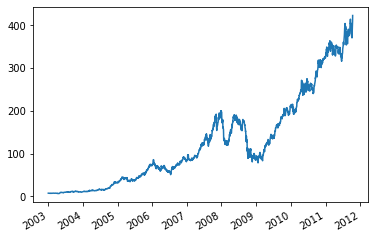

In [520]:
close_px['AAPL'].plot()

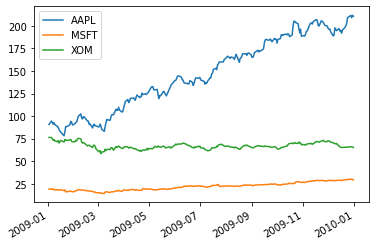

In [521]:
close_px.loc['2009'].plot()

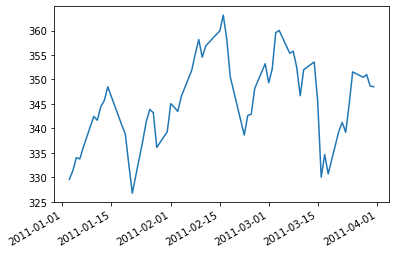

In [522]:
close_px['AAPL'].loc['01-2011':'03-2011'].plot()